# Logistic regression

In this notebook we are going to build logistic regression models on our data.

## Libraries
---

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

## Logistic Regression on the full size dataset
---

In [24]:
df = pd.read_csv('../data/pre-processed-data/data-full-size.csv')
df.head()

,Unnamed: 0,id,Gender,Age,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Vintage,Response,...,Policy_Sales_Channel_155,Policy_Sales_Channel_156,Policy_Sales_Channel_157,Policy_Sales_Channel_158,Policy_Sales_Channel_159,Policy_Sales_Channel_160,Policy_Sales_Channel_163,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,0,1,1,44,1,0,1,40454.0,217,1,...,0,0,0,0,0,0,0,0,0,1
1,1,2,1,76,1,0,0,33536.0,183,0,...,0,0,0,0,0,0,0,1,0,0
2,2,3,1,47,1,0,1,38294.0,27,1,...,0,0,0,0,0,0,0,0,0,1
3,3,4,1,21,1,1,0,28619.0,203,0,...,0,0,0,0,0,0,0,0,1,0
4,4,5,0,29,1,1,0,27496.0,39,0,...,0,0,0,0,0,0,0,0,1,0


In [25]:
df = df.iloc[:,2:]
df

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Vintage,Response,Region_Code_0,Region_Code_1,...,Policy_Sales_Channel_155,Policy_Sales_Channel_156,Policy_Sales_Channel_157,Policy_Sales_Channel_158,Policy_Sales_Channel_159,Policy_Sales_Channel_160,Policy_Sales_Channel_163,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,1,44,1,0,1,40454.0,217,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,76,1,0,0,33536.0,183,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,47,1,0,1,38294.0,27,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,21,1,1,0,28619.0,203,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,29,1,1,0,27496.0,39,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,1,74,1,1,0,30170.0,88,0,0,0,...,0,0,0,0,0,0,0,1,0,0
381105,1,30,1,1,0,40016.0,131,0,0,0,...,0,0,0,0,0,0,0,0,1,0
381106,1,21,1,1,0,35118.0,161,0,0,0,...,0,0,0,0,0,1,0,0,1,0
381107,0,68,1,0,1,44617.0,74,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [30]:
X = df.drop('Response', axis = 1)
y = df['Response']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 12)

In [34]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(285831, 218)
(285831,)
(95278, 218)
(95278,)


In [66]:
l_reg = LogisticRegression(C = 100, max_iter = 100000000)
l_reg.fit(X_train, y_train)

print('With our initial Logistic regression model we are able to get a test score of {}'.format(l_reg.score(X_test, y_test)))

With our initial Logistic regression model we are able to get a test score of 0.8762043703688155


In [71]:
def logistic_c_trials(c_list, X_train, X_test, y_train, y_test):
    scores_dict = {'Train Score': [], 'Test Score': [], 'C': []}
    
    for c in c_list:
        model = LogisticRegression(C=c, max_iter = 100000000)

        model.fit(X_train, y_train)
        scores_dict['Train Score'].append(model.score(X_train, y_train))
        scores_dict['Test Score'].append(model.score(X_test, y_test))
        scores_dict['C'].append(c)
    
    return scores_dict

In [81]:
c_list = [0.0000001, 0.000001, 0.0002, 0.005, 0.7, 100, 10000]
results = logistic_c_trials(c_list, X_train, X_test, y_train, y_test)

In [82]:
results

{'Train Score': [0.8771336908872726,
  0.8771336908872726,
  0.8771336908872726,
  0.8757342625537468,
  0.8751325083703307,
  0.8751255112286631,
  0.8751255112286631],
 'Test Score': [0.8783454732467096,
  0.8783454732467096,
  0.8783454732467096,
  0.8765192384390941,
  0.8761938747664728,
  0.8762043703688155,
  0.8762043703688155],
 'C': [1e-07, 1e-06, 0.0002, 0.005, 0.7, 100, 10000]}

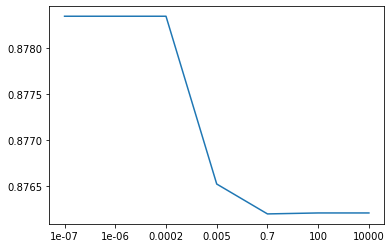

In [85]:
import matplotlib.pyplot as plt

#plt.plot(range(len(results['C'])), results['Test Score'])

fig, ax = plt.subplots()
ax.plot(range(len(results['C'])), results['Test Score'])
ax.set_xticks(range(len(c_list)))
ax.set_xticklabels(c_list)
plt.show()

In [42]:
sample = X.iloc[1].to_list()
l_reg.predict([sample])

array([0])

In [43]:
sample

[1.0,
 76.0,
 1.0,
 0.0,
 0.0,
 33536.0,
 183.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.